In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def data_roader(file):
    data = pd.read_csv(file)
    data = data.sort_index(axis=1)
    columns_to_drop = [col for col in data.columns if '__MIN' in col or '__MAX' in col]
    data_cleaned = data.drop(columns=columns_to_drop)
    data_cleaned.columns = [col.split(' -')[0].strip() for col in data_cleaned.columns]
    data_cleaned.drop(['Step'],axis=1, inplace=True)

    return data_cleaned

In [21]:
def mean_gen(df):
    base_df = df.iloc[:,0:3]
    feat_name = '_'.join(base_df.columns[1].split('_')[1:-1])
    base_df[f'Mean_{feat_name}'] = base_df.apply(lambda row: np.mean(row), axis=1)
    base_df[f'Stdev_{feat_name}'] = base_df.apply(lambda row: np.std(row), axis=1)
    base_df = base_df.iloc[:,-2:]

    for i in range(3,len(df.columns),3):
        tem_df = df.iloc[:,i:i+3]
        feat_name = '_'.join(tem_df.columns[1].split('_')[1:-1])
        tem_df[f'Mean_{feat_name}'] = tem_df.apply(lambda row: np.mean(row), axis=1)
        tem_df[f'Stdev_{feat_name}'] = tem_df.apply(lambda row: np.std(row), axis=1)
        tem_df = tem_df.iloc[:,-2:]

        base_df = pd.concat([base_df, tem_df], axis=1)
    
    return base_df

In [22]:
gene_feat = 'gene_rnd'
Gene_Rnd_AssayAP_epochs = data_roader(f'/Users/jihwanlim/Downloads/{gene_feat}_AssayAP.csv')
Gene_Rnd_GeneAP_epochs = data_roader(f'/Users/jihwanlim/Downloads/{gene_feat}_GeneAP.csv')   

Gene_Rnd_GeneAP_epochs_df = mean_gen(Gene_Rnd_GeneAP_epochs)
Gene_Rnd_AssayAP_epochs_df = mean_gen(Gene_Rnd_AssayAP_epochs)

/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_42782/876436688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df[f'Mean_{feat_name}'] = base_df.apply(lambda row: np.mean(row), axis=1)
/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_42782/876436688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df[f'Stdev_{feat_name}'] = base_df.apply(lambda row: np.std(row), axis=1)
/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_42782/876436688.py:11: SettingWithCopyWar

In [23]:
Gene_Rnd_GeneAP_epochs_df.columns = ['CNV',	'Stdev_CNV',	'Expression','Stdev_Expression'	,'a'	,'b']
Gene_Rnd_AssayAP_epochs_df.columns = ['CNV',	'Stdev_CNV',	'Expression','Stdev_Expression'	,'a'	,'b']

In [24]:
def graph_plot(df, title, ax):
    color_list = ['lightblue','pink','lightgreen']
    color_index = 0
    #plt.figure(figsize=(10, 5))
    for i in range(0, len(df.columns),2):
        ax.plot(df.index, df.iloc[:,i], marker='o', linestyle='-', label=df.columns[i])
        ax.fill_between(df.index, 
                        df.iloc[:,i] - df.iloc[:,i+1], 
                        df.iloc[:,i] + df.iloc[:,i+1], 
                        color=color_list[color_index], alpha=0.3)
        color_index += 1

    ax.legend(loc='upper left', framealpha=1, fontsize=15) 
    ax.set_title(title, fontsize=15)  
    ax.set_xlabel('Epoch', fontsize=15)  
    ax.set_ylabel('AP Score', fontsize=15) 
    ax.set_ylim(0.2, 0.8) 
    y_lines = np.linspace(0, 1, 11) 
    for y_line in y_lines:
        ax.axhline(y=y_line, color='gray', linestyle='--', linewidth=0.5)  
    #plt.show() 

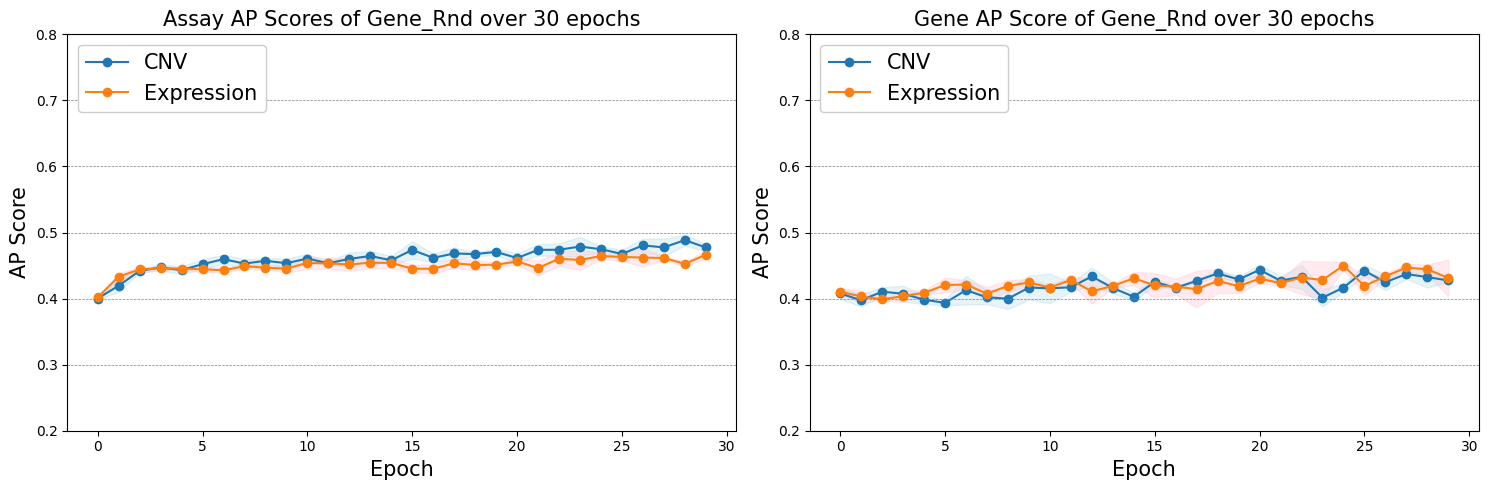

In [25]:
#2.3.4	Gene Feature Validation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

name = ['Assay AP Scores of Gene_Rnd over 30 epochs', 'Gene AP Score of Gene_Rnd over 30 epochs']

graph_plot(Gene_Rnd_AssayAP_epochs_df[['CNV',	'Stdev_CNV',	'Expression','Stdev_Expression']], name[1], axes[1])
graph_plot(Gene_Rnd_GeneAP_epochs_df[['CNV',	'Stdev_CNV',	'Expression','Stdev_Expression']], name[0], axes[0])

plt.tight_layout()
plt.show()

In [34]:
geen_feat = 'cgp'
CGP_AssayAP_epochs = data_roader(f'/Users/jihwanlim/Downloads/{gene_feat}_AssayAP.csv')
CGP_Rnd_GeneAP_epochs = data_roader(f'/Users/jihwanlim/Downloads/{gene_feat}_GeneAP.csv')   

CGP_GeneAP_epochs_df = mean_gen(CGP_AssayAP_epochs)
CGP_AssayAP_epochs_df = mean_gen(CGP_Rnd_GeneAP_epochs)

CGP_GeneAP_epochs_df = CGP_GeneAP_epochs_df[['Mean_cnv_soft_rnd','Stdev_cnv_soft_rnd','Mean_expression_rnd','Stdev_expression_rnd']]
CGP_AssayAP_epochs_df = CGP_AssayAP_epochs_df[['Mean_cnv_soft_rnd','Stdev_cnv_soft_rnd','Mean_expression_rnd','Stdev_expression_rnd']]

CGP_GeneAP_epochs_df.columns = ['CNV_Rnd',	'Stdev_CNV_Rnd',	'Expression_Rnd','Stdev_Expression_Rnd']
CGP_AssayAP_epochs_df.columns = ['CNV_Rnd',	'Stdev_CNV_Rnd',	'Expression_Rnd','Stdev_Expression_Rnd']

/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_42782/876436688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df[f'Mean_{feat_name}'] = base_df.apply(lambda row: np.mean(row), axis=1)
/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_42782/876436688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df[f'Stdev_{feat_name}'] = base_df.apply(lambda row: np.std(row), axis=1)
/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_42782/876436688.py:11: SettingWithCopyWar

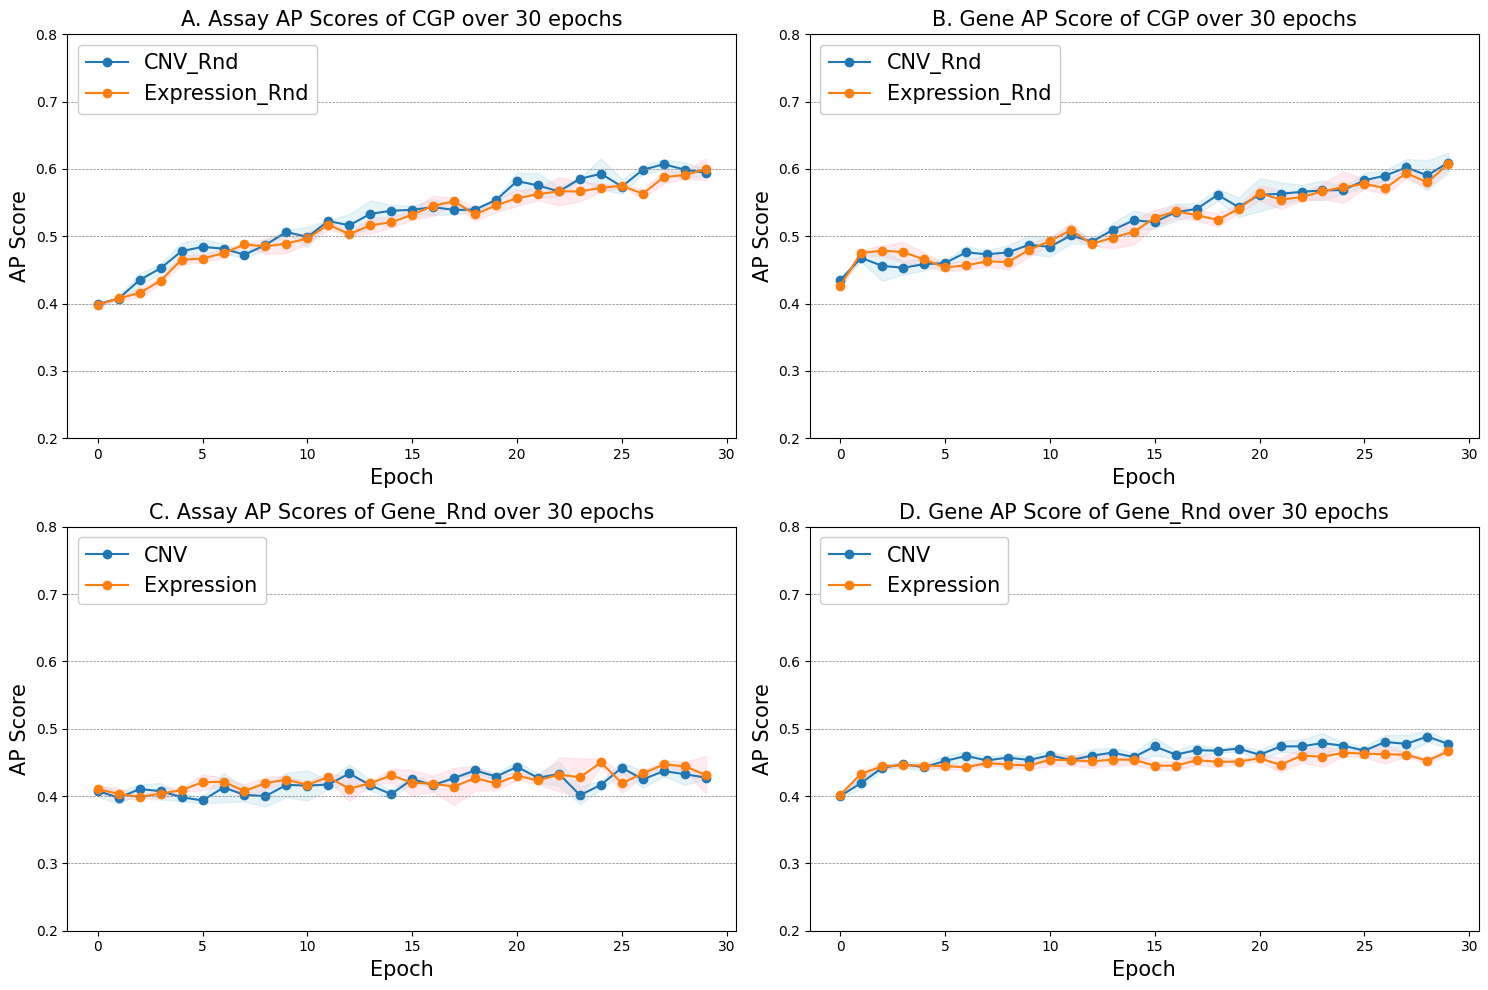

In [38]:
#2.3.4	Gene Feature Validation
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

name = ['A. Assay AP Scores of CGP over 30 epochs', 'B. Gene AP Score of CGP over 30 epochs',
        'C. Assay AP Scores of Gene_Rnd over 30 epochs', 'D. Gene AP Score of Gene_Rnd over 30 epochs']

graph_plot(CGP_AssayAP_epochs_df, name[0], axes[0,0])
graph_plot(CGP_GeneAP_epochs_df, name[1], axes[0,1])

graph_plot(Gene_Rnd_AssayAP_epochs_df[['CNV',	'Stdev_CNV',	'Expression','Stdev_Expression']], name[2], axes[1,0])
graph_plot(Gene_Rnd_GeneAP_epochs_df[['CNV',	'Stdev_CNV',	'Expression','Stdev_Expression']], name[3], axes[1,1])


plt.tight_layout()
plt.show()

In [ ]:
gene_feat = 'cgp'
CGP_AssayAP_epochs = data_roader(f'/Users/jihwanlim/Downloads/{gene_feat}_AssayAP.csv')
CGP_Rnd_GeneAP_epochs = data_roader(f'/Users/jihwanlim/Downloads/{gene_feat}_GeneAP.csv')   

CGP_GeneAP_epochs_df = mean_gen(CGP_AssayAP_epochs)
CGP_AssayAP_epochs_df = mean_gen(CGP_Rnd_GeneAP_epochs)

CGP_GeneAP_epochs_df = CGP_GeneAP_epochs_df[['Mean_cnv_soft','Stdev_cnv_soft','Mean_expression','Stdev_expression']]
CGP_AssayAP_epochs_df = CGP_AssayAP_epochs_df[['Mean_cnv_soft','Stdev_cnv_soft','Mean_expression','Stdev_expression']]

CGP_GeneAP_epochs_df.columns = ['CNV',	'Stdev_CNV',	'Expression','Stdev_Expression']
CGP_AssayAP_epochs_df.columns = ['CNV',	'Stdev_CNV',	'Expression','Stdev_Expression']

In [21]:
def mean_gen_tvv(df,name):
    base_df = df.iloc[:,0:3]
    model_name = '_'.join(base_df.columns[1].split('_')[:-1]) + f' {name}'
    base_df[f'Mean_{model_name}'] = base_df.apply(lambda row: np.mean(row), axis=1)
    base_df[f'Stdev_{model_name}'] = base_df.apply(lambda row: np.std(row), axis=1)
    base_df = base_df.iloc[:,-2:]

    for i in range(3,len(df.columns),3):
        tem_df = df.iloc[:,i:i+3]
        model_name = '_'.join(tem_df.columns[1].split('_')[:-1]) + f' {name}'
        tem_df[f'Mean_{model_name}'] = tem_df.apply(lambda row: np.mean(row), axis=1)
        tem_df[f'Stdev_{model_name}'] = tem_df.apply(lambda row: np.std(row), axis=1)
        tem_df = tem_df.iloc[:,-2:]

        base_df = pd.concat([base_df, tem_df], axis=1)
    
    return base_df

train_loss = data_roader('/Users/jihwanlim/Desktop/Final_Result/DLP_Learning/DLP_CELL_TrainLoss.csv')
val_ap = data_roader('/Users/jihwanlim/Desktop/Final_Result/DLP_Learning/DLP_CELL_ValAP.csv') 
val_loss = data_roader('/Users/jihwanlim/Desktop/Final_Result/DLP_Learning/DLP_CELL_ValLoss.csv')

train_loss_df = mean_gen_tvv(train_loss, 'Train Loss')
val_ap_df = mean_gen_tvv(val_ap, 'Validation AP')
val_loss_df = mean_gen_tvv(val_loss, 'Validation Loss')

/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_32171/2713260772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df[f'Mean_{model_name}'] = base_df.apply(lambda row: np.mean(row), axis=1)
/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_32171/2713260772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df[f'Stdev_{model_name}'] = base_df.apply(lambda row: np.std(row), axis=1)
/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_32171/2713260772.py:11: SettingWithCo

In [47]:
a = data_roader('/Users/jihwanlim/Downloads/wandb_export_2024-06-07T21_11_45.815+02_00.csv')
b = mean_gen_tvv(a, 'Validation Loss')

/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_32171/2713260772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df[f'Mean_{model_name}'] = base_df.apply(lambda row: np.mean(row), axis=1)
/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_32171/2713260772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df[f'Stdev_{model_name}'] = base_df.apply(lambda row: np.std(row), axis=1)
/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_32171/2713260772.py:11: SettingWithCo

In [32]:
import matplotlib.pyplot as plt

def graph_plot_vtt(t_loss_df,ap_df, v_loss_df, model, title, ax):

    df = pd.concat([t_loss_df[[f'Mean_{model} Train Loss',f'Stdev_{model} Train Loss']],
                          ap_df[[f'Mean_{model} Validation AP',f'Stdev_{model} Validation AP']],
                          v_loss_df[[f'Mean_{model} Validation Loss',f'Stdev_{model} Validation Loss']]],axis=1)
    
    df.columns = ['Train Loss', 'stdev1', 'Validation AP',' stdev2', 'Validation Loss', 'stdev3']
    
    color_list = ['lightblue','pink','lightgreen']
    color_index = 0

    #plt.figure(figsize=(10, 5))

    for i in range(0, len(df.columns),2):
        ax.plot(df.index, df.iloc[:,i], marker='o', linestyle='-', label=df.columns[i])
        ax.fill_between(df.index, 
                        df.iloc[:,i] - df.iloc[:,i+1], 
                        df.iloc[:,i] + df.iloc[:,i+1], 
                        color=color_list[color_index], alpha=0.3)
        color_index += 1

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12) 
    ax.set_title(title, fontsize=20)  # 그래프 제목
    ax.set_xlabel('Epoch', fontsize=15)  # x축 레이블
    ax.set_ylabel('AP Score', fontsize=15)  # y축 레이블
    ax.set_ylim(0.0, 1.0) 
    y_lines = np.linspace(0, 1, 11)  # 0에서 1 사이를 10개 구간으로 나누어 가로선 위치 결정
    for y_line in y_lines:
        ax.axhline(y=y_line, color='gray', linestyle='--', linewidth=0.5)  

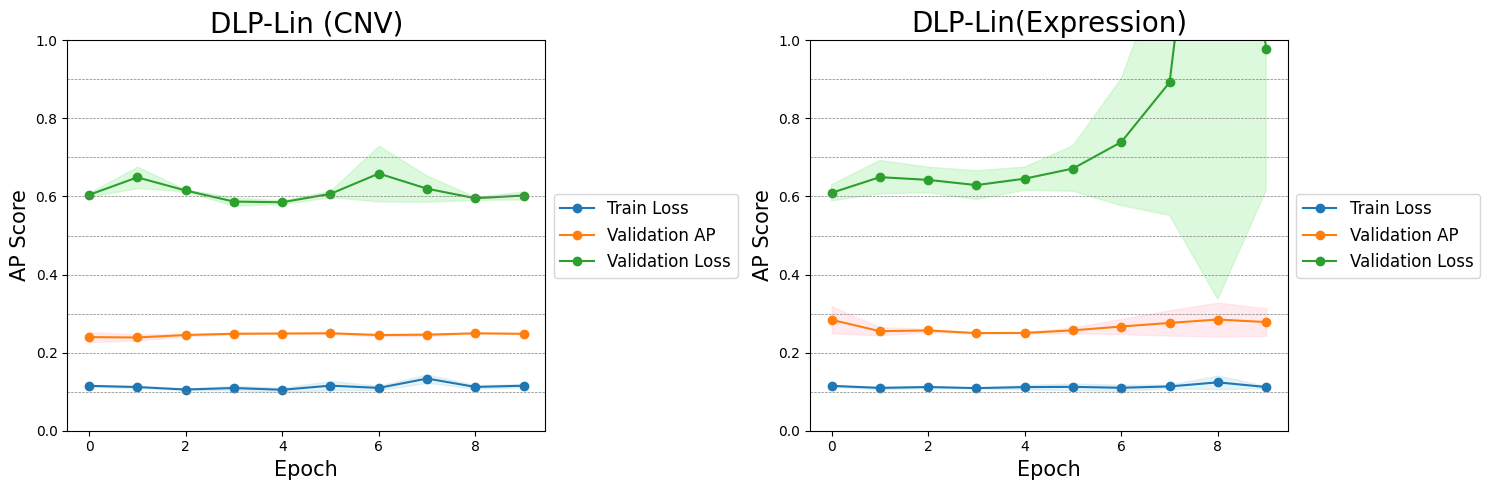

In [38]:
# 2.2.2	Implementing Biological Features on DLP
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

graph_plot_vtt(train_loss_df, val_ap_df, val_loss_df, 'DLP-Lin_cnv_soft', 'DLP-Lin (CNV)', axes[0])
graph_plot_vtt(train_loss_df, val_ap_df, val_loss_df, 'DLP-Lin_expression', 'DLP-Lin (Expression)', axes[1])

plt.tight_layout()
plt.show()

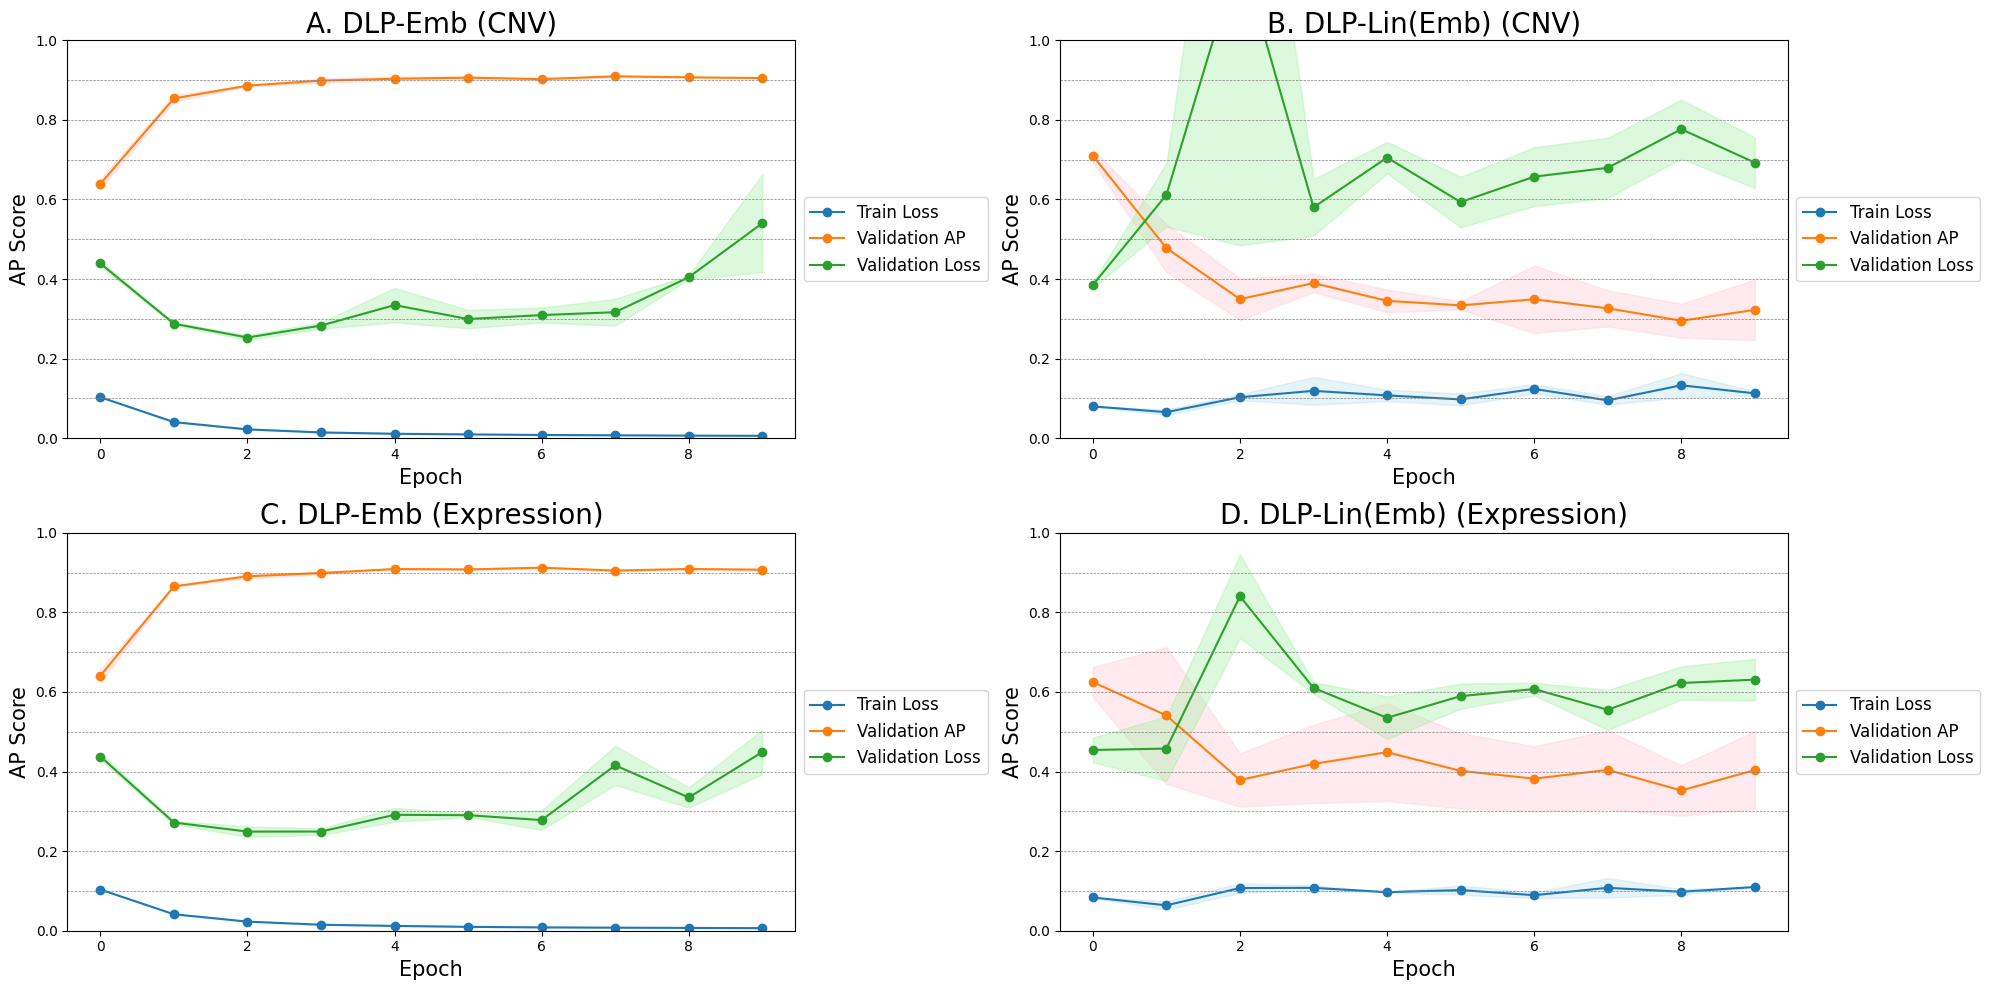

In [46]:
# 2.2.3	Implementing Biological Features on DLP
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

graph_plot_vtt(train_loss_df, val_ap_df, val_loss_df, 'DLP_cnv_soft', 'A. DLP-Emb (CNV)', axes[0,0])
graph_plot_vtt(train_loss_df, val_ap_df, val_loss_df, 'DLP-LinEmb_cnv_soft', 'B. DLP-Lin(Emb) (CNV)', axes[0,1])
graph_plot_vtt(train_loss_df, val_ap_df, val_loss_df, 'DLP_expression', 'C. DLP-Emb (Expression)', axes[1,0])
graph_plot_vtt(train_loss_df, val_ap_df, val_loss_df, 'DLP-LinEmb_expression', 'D. DLP-Lin(Emb) (Expression)', axes[1,1])

plt.tight_layout()
plt.show()

In [ ]:
# 3.2.3	Implementing Biological Features on DLP
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

models = ['A. DLP_cnv_soft', 'B. DLP-LinEmb_cnv_soft']

for model, ax in zip(models, axes):
    # Assuming you have the dataframes t_loss_df, ap_df, v_loss_df already loaded
    graph_plot_vtt(train_loss_df, val_ap_df, val_loss_df, model, ax)

plt.tight_layout()
plt.show()

##########Not Used#############

In [12]:
cgp_cor = data_roader('/Users/jihwanlim/Desktop/Final_Result/Correlation/CGP_Cor.csv')
go_cor = data_roader('/Users/jihwanlim/Desktop/Final_Result/Correlation/GO_Cor.csv')

In [13]:
cgp_cor_fin = mean_gen(cgp_cor)
go_cor_fin = mean_gen(go_cor)

cgp_cor_fin.columns = ['HetGNN-Base with CGP & Cell_Empty','STDEV']
go_cor_fin.columns = ['HetGNN-Lin with GO & Cell_Empty','STDEV']

/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_32171/876436688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df[f'Mean_{feat_name}'] = base_df.apply(lambda row: np.mean(row), axis=1)
/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_32171/876436688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df[f'Stdev_{feat_name}'] = base_df.apply(lambda row: np.std(row), axis=1)
/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_32171/876436688.py:4: SettingWithCopyWarn

In [14]:
def graph_plot_cor(df, title, ax):
    color_list = ['lightblue','pink','lightgreen']
    color_index = 0
    #plt.figure(figsize=(10, 5))
    for i in range(0, len(df.columns),2):
        ax.plot(df.index, df.iloc[:,i], marker='o', linestyle='-', label=df.columns[i])
        ax.fill_between(df.index, 
                        df.iloc[:,i] - df.iloc[:,i+1], 
                        df.iloc[:,i] + df.iloc[:,i+1], 
                        color=color_list[color_index], alpha=0.3)
        color_index += 1

    ax.legend(loc='upper left', framealpha=1, fontsize=15) 
    ax.set_title(title, fontsize=15)  # 그래프 제목
    ax.set_xlabel('Epoch', fontsize=15)  # x축 레이블
    ax.set_ylabel('Correlation Score', fontsize=15)  # y축 레이블
    ax.set_ylim(0.2, 0.8) 
    y_lines = np.linspace(0, 1, 11)  # 0에서 1 사이를 10개 구간으로 나누어 가로선 위치 결정
    for y_line in y_lines:
        ax.axhline(y=y_line, color='gray', linestyle='--', linewidth=0.5)  
    #plt.show()  # 그래프 보여주기

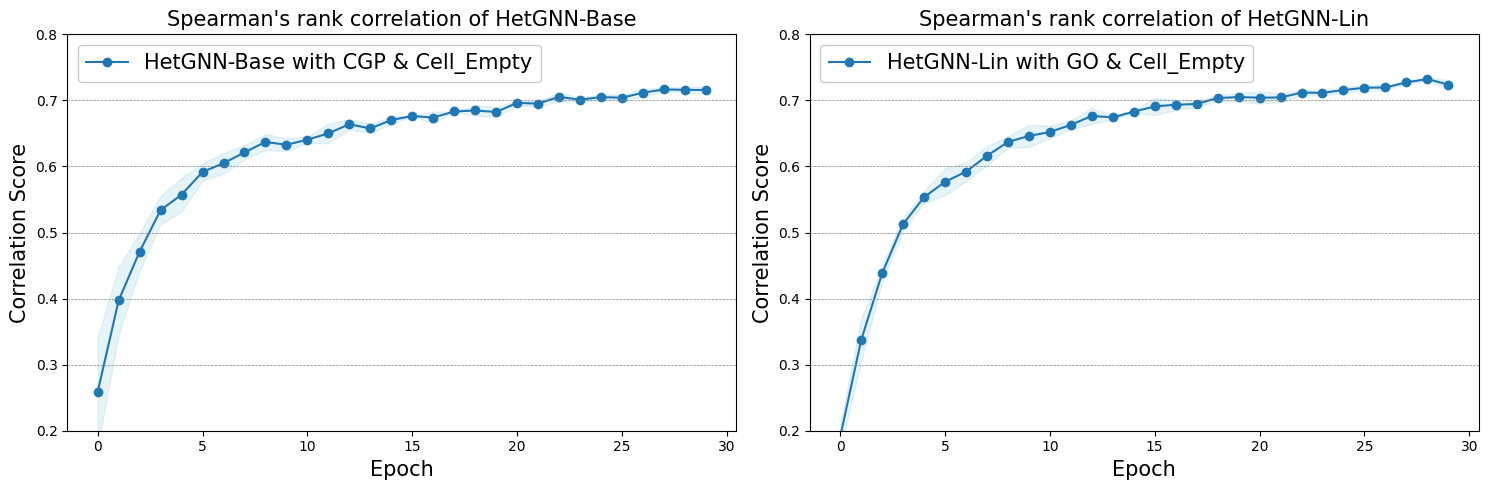

In [15]:
#3.3.5	Gene Feature Validation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

name = ["Spearman's rank correlation of HetGNN-Base" ,"Spearman's rank correlation of HetGNN-Lin"]

graph_plot_cor(cgp_cor_fin, name[0], axes[0])
graph_plot_cor(go_cor_fin, name[1], axes[1])

plt.tight_layout()
plt.show()